In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
cancer = pd.read_csv('https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/brest_cancer.csv')


In [ ]:
cancer

,id,clump_thickness,unif_cell_size,unif_cell_shape,marginal_adhesion,single_epith_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [ ]:
cancer.isnull().sum()

id                        0
clump_thickness           0
unif_cell_size            0
unif_cell_shape           0
marginal_adhesion         0
single_epith_cell_size    0
bare_nuclei               0
bland_chromatin           0
normal_nucleoli           0
mitoses                   0
class                     0
dtype: int64

In [ ]:
cancer.replace('?', np.nan, inplace=True)

In [ ]:
cancer.isnull().sum().sort_values()

id                         0
clump_thickness            0
unif_cell_size             0
unif_cell_shape            0
marginal_adhesion          0
single_epith_cell_size     0
bland_chromatin            0
normal_nucleoli            0
mitoses                    0
class                      0
bare_nuclei               16
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(cancer)

In [ ]:
X

array([[1.000025e+06, 5.000000e+00, 1.000000e+00, ..., 1.000000e+00,
        1.000000e+00, 2.000000e+00],
       [1.002945e+06, 5.000000e+00, 4.000000e+00, ..., 2.000000e+00,
        1.000000e+00, 2.000000e+00],
       [1.015425e+06, 3.000000e+00, 1.000000e+00, ..., 1.000000e+00,
        1.000000e+00, 2.000000e+00],
       ...,
       [8.888200e+05, 5.000000e+00, 1.000000e+01, ..., 1.000000e+01,
        2.000000e+00, 4.000000e+00],
       [8.974710e+05, 4.000000e+00, 8.000000e+00, ..., 6.000000e+00,
        1.000000e+00, 4.000000e+00],
       [8.974710e+05, 4.000000e+00, 8.000000e+00, ..., 4.000000e+00,
        1.000000e+00, 4.000000e+00]])

In [ ]:
cancer_df =pd.DataFrame(X,columns = cancer.columns) 

In [ ]:
cancer_df.isnull().sum() 

id                        0
clump_thickness           0
unif_cell_size            0
unif_cell_shape           0
marginal_adhesion         0
single_epith_cell_size    0
bare_nuclei               0
bland_chromatin           0
normal_nucleoli           0
mitoses                   0
class                     0
dtype: int64

In [ ]:
cancer_df['class']=cancer['class']

In [ ]:
cancer_df

,id,clump_thickness,unif_cell_size,unif_cell_shape,marginal_adhesion,single_epith_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025.0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2
1,1002945.0,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,2
2,1015425.0,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,2
3,1016277.0,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,2
4,1017023.0,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715.0,3.0,1.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0,2
695,841769.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2
696,888820.0,5.0,10.0,10.0,3.0,7.0,3.0,8.0,10.0,2.0,4
697,897471.0,4.0,8.0,6.0,4.0,3.0,4.0,10.0,6.0,1.0,4


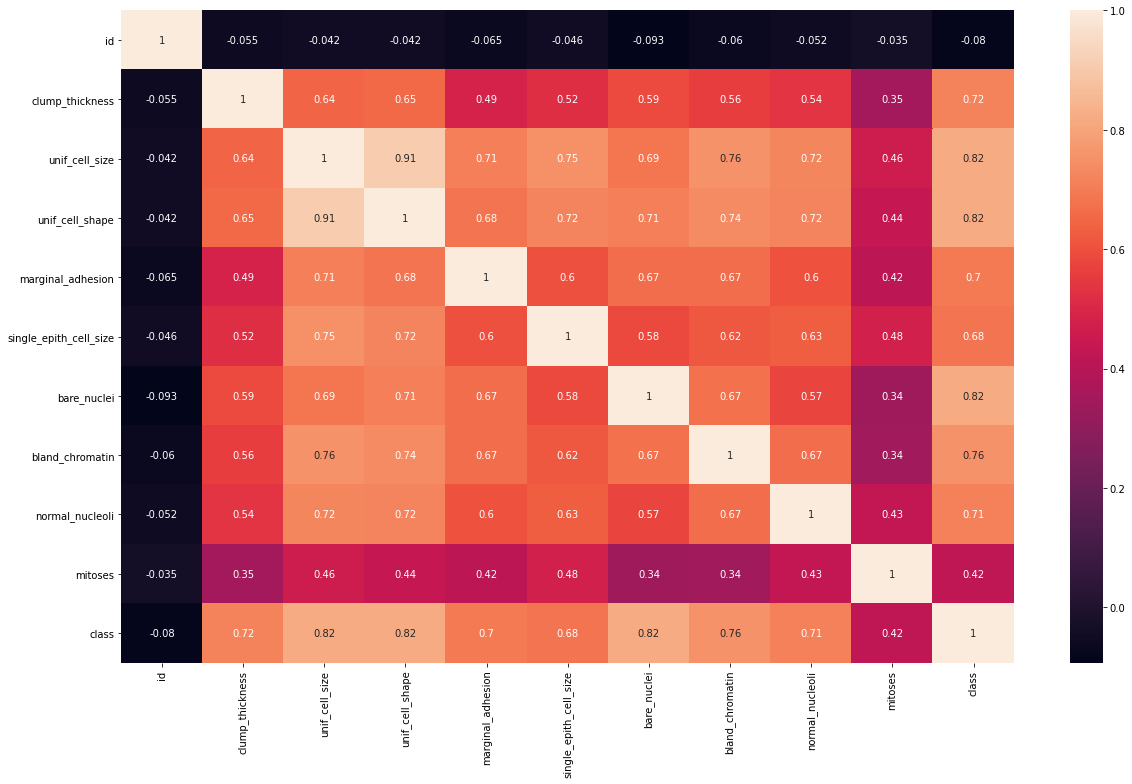

In [ ]:
plt.figure(figsize=(20,12))
sns.heatmap(cancer_df.corr(), annot=True)

In [ ]:
cancer_df.drop(['id'],axis=1,inplace=True)

**Cross Validation**

In [ ]:
X=cancer_df.drop(['class'],axis=1)

In [ ]:
X

,clump_thickness,unif_cell_size,unif_cell_shape,marginal_adhesion,single_epith_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses
0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0
1,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0
2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0
3,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0
4,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
694,3.0,1.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0
695,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0
696,5.0,10.0,10.0,3.0,7.0,3.0,8.0,10.0,2.0
697,4.0,8.0,6.0,4.0,3.0,4.0,10.0,6.0,1.0


In [ ]:
Y=cancer_df['class']

In [ ]:
Y

0      2
1      2
2      2
3      2
4      2
      ..
694    2
695    2
696    4
697    4
698    4
Name: class, Length: 699, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

test_score = []
train_score = []


In [ ]:
for i in range(1, 21):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(X_train, Y_train)
  train_score.append(knn.score(X_train, Y_train))
  test_score.append(knn.score(X_test, Y_test))


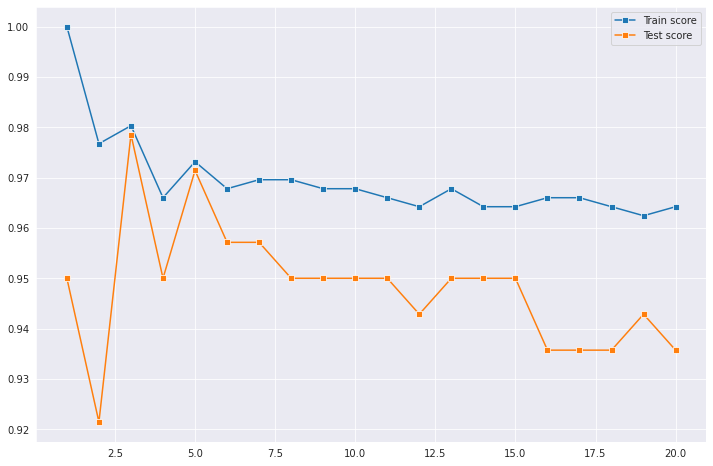

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
sns.lineplot(range(1,21), train_score, label = 'Train score', marker = 's')
sns.lineplot(range(1,21), test_score, label = 'Test score', marker = 's')


In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
knn.score(X_test, Y_test)


0.9785714285714285